AML ANOMALY DETECTION SYSTEM
Detecting Suspicious Financial Transactions

[1/7] Generating synthetic transaction data...
✓ Generated 10,000 transactions
  - Normal: 9,500 (95.0%)
  - Suspicious: 500 (5.0%)

Dataset shape: (10000, 10)

First few records:
   transaction_id         amount  frequency_24h  avg_transaction_size  \
0            6253  155877.017879              2           9413.764913   
1            4685     629.169622              3           4909.928262   
2            1732    1765.209759              1           6171.801102   
3            4743    2988.206181              3           5722.688950   
4            4522   14935.549267              1           5032.562379   

   num_countries  account_age_days  velocity_score  round_amount_flag  \
0              1              2460        0.261960                  0   
1              1              3636        0.350605                  0   
2              1              2815        0.234130                  0   
3              

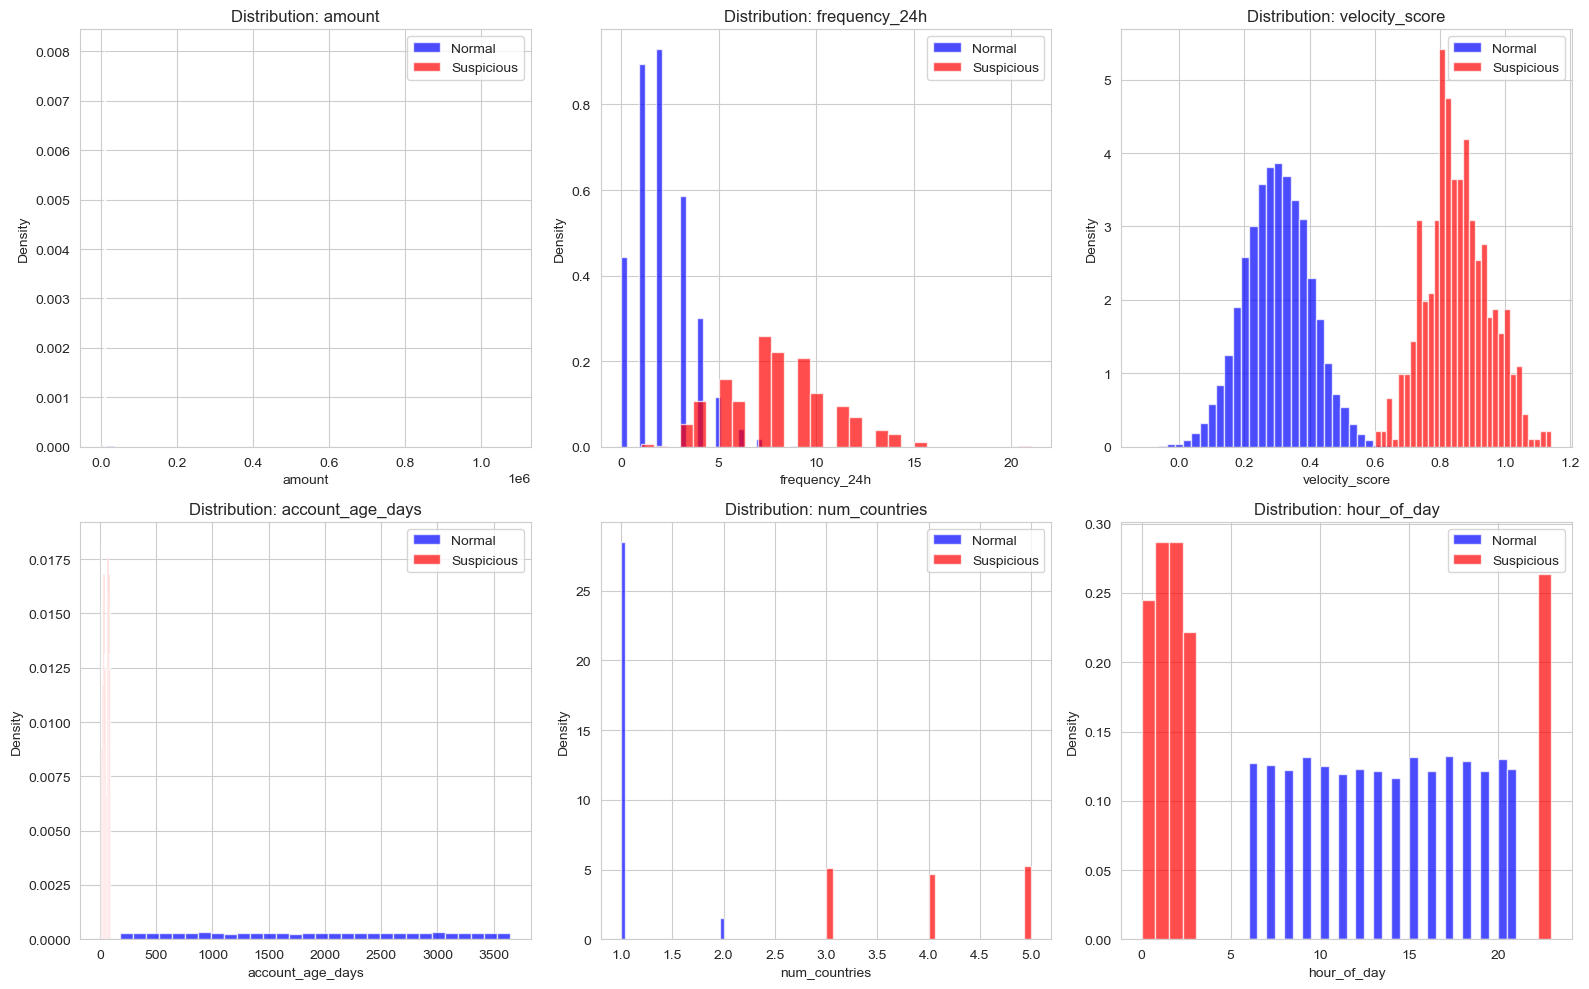


Correlation Analysis:


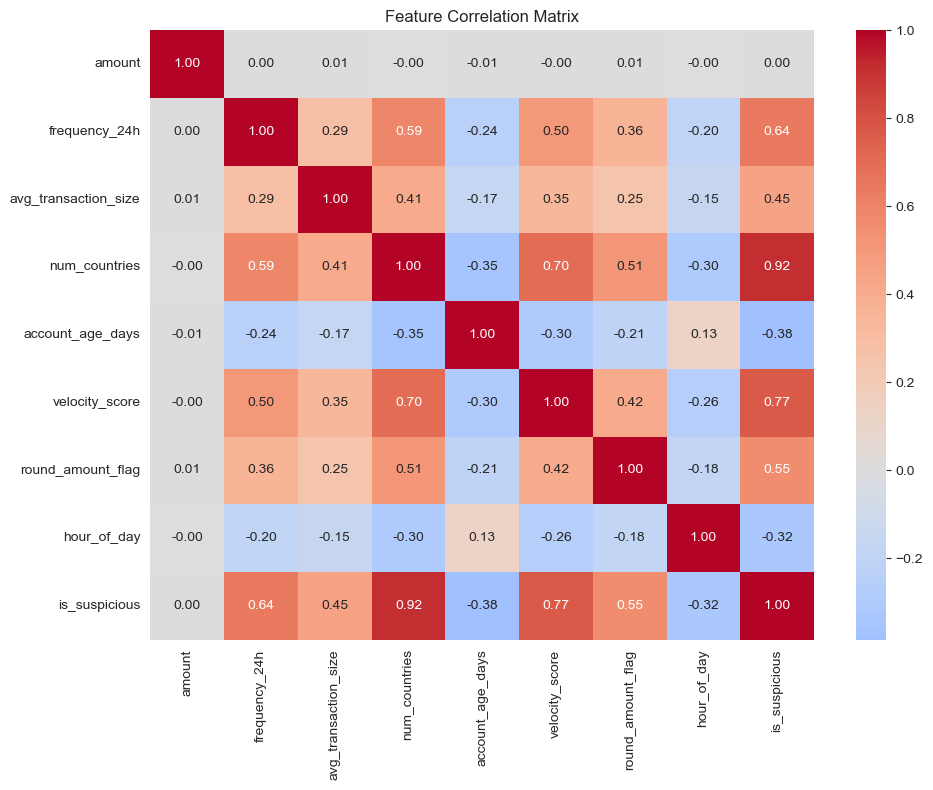


[3/7] Engineering AML risk features...
✓ Created 5 risk flags and composite risk score

Risk Score Distribution:
                count      mean       std       min       25%       50%  \
is_suspicious                                                             
0              9500.0  0.136033  0.111651 -0.028943  0.063979  0.085815   
1               500.0  0.852734  0.143247  0.450632  0.734455  0.936472   

                    75%       max  
is_suspicious                      
0              0.133562  0.589615  
1              0.966155  1.035750  

[4/7] Training unsupervised anomaly detection models...

Training Isolation Forest...
Training DBSCAN...

UNSUPERVISED MODEL PERFORMANCE

Iso Forest Anomaly:
  Precision: 0.946
  Recall: 0.946
  F1-Score: 0.946

Dbscan Anomaly:
  Precision: 0.065
  Recall: 0.724
  F1-Score: 0.119

[5/7] Training supervised classification model...

SUPERVISED MODEL PERFORMANCE

Classification Report:
              precision    recall  f1-score   support


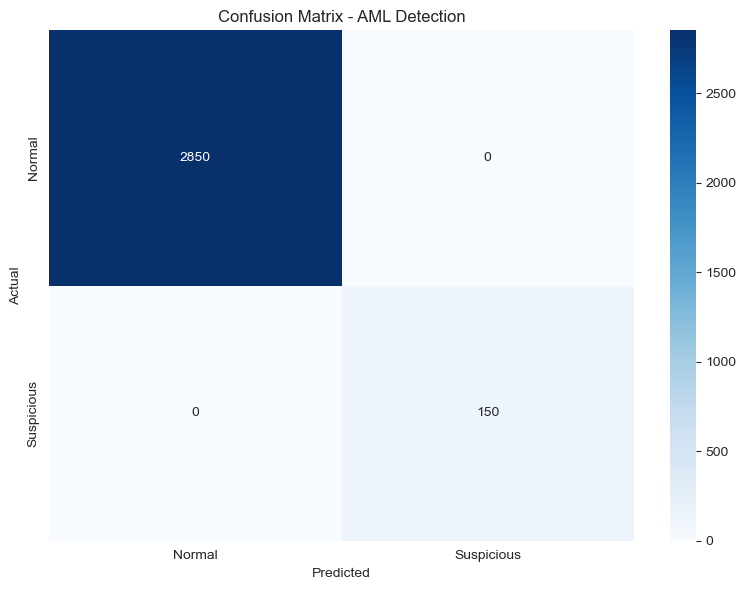

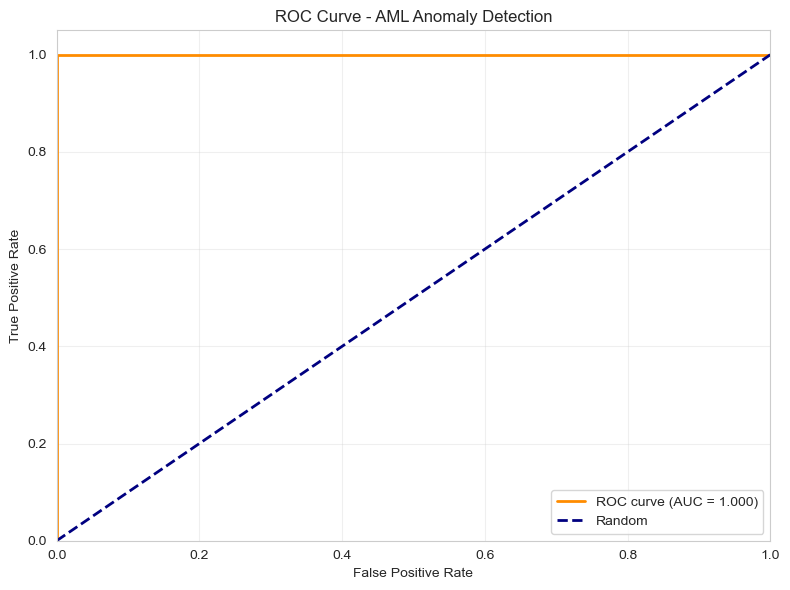


[6/7] Analyzing feature importance...

Top Features for AML Detection:
                feature  importance
3         num_countries    0.295230
4      account_age_days    0.256083
5        velocity_score    0.148276
2  avg_transaction_size    0.144494
8            risk_score    0.130500
6     round_amount_flag    0.018135
1         frequency_24h    0.006826
7           hour_of_day    0.000228
0                amount    0.000227


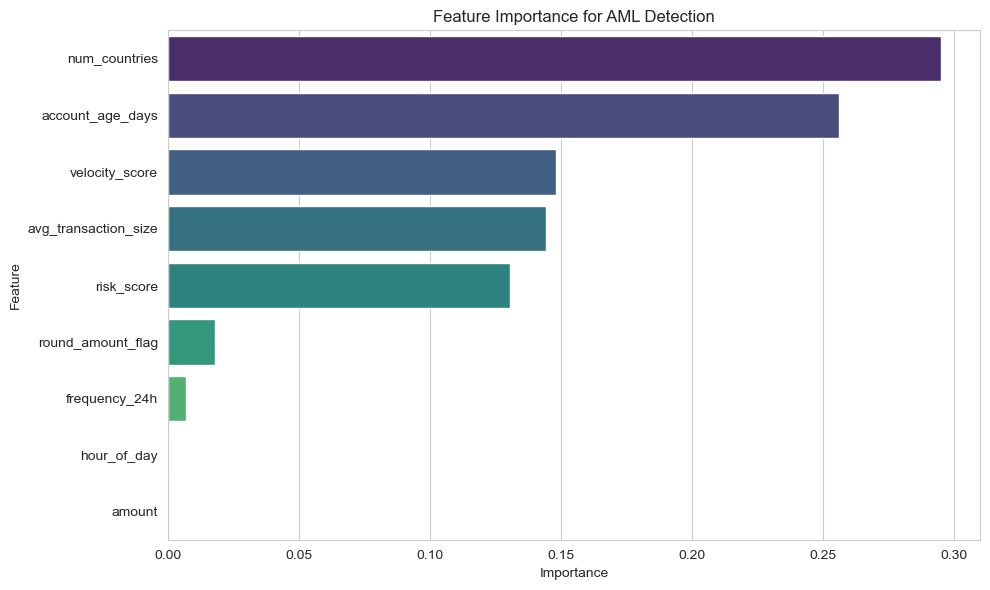


[7/7] Generating high-risk transaction report...

HIGH-RISK TRANSACTION REPORT

Total flagged transactions: 500
True positives: 500
Precision: 100.00%

Top 10 Highest Risk Transactions:
 transaction_id  amount  frequency_24h  num_countries  risk_score  ml_risk_probability  is_suspicious
           9931  9000.0              7              3    0.676834                  1.0              1
           9962  9000.0             11              5    0.671669                  1.0              1
           9615  9000.0              8              5    0.748751                  1.0              1
           9947  9000.0              5              4    0.515372                  1.0              1
           9765 10000.0             21              4    0.926925                  1.0              1
           9788  9900.0              8              3    0.943823                  1.0              1
           9539 10000.0              8              3    0.971805                  1.0             

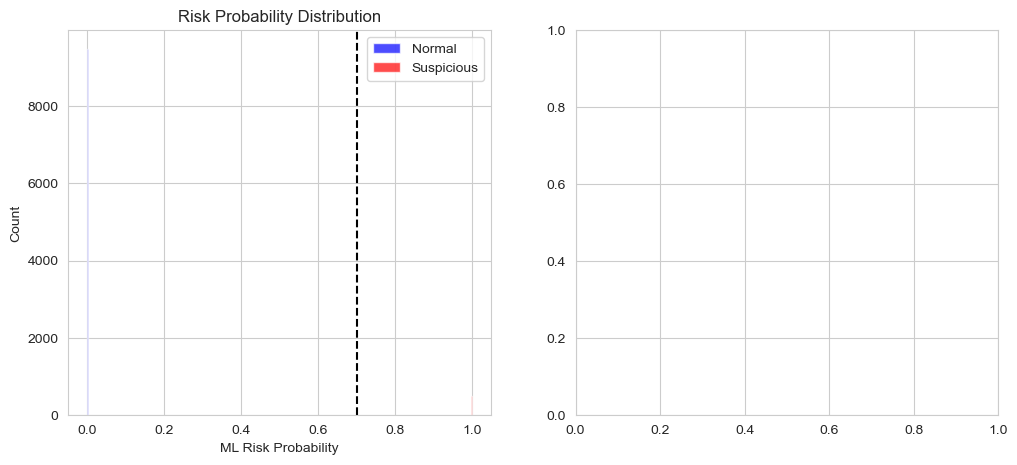

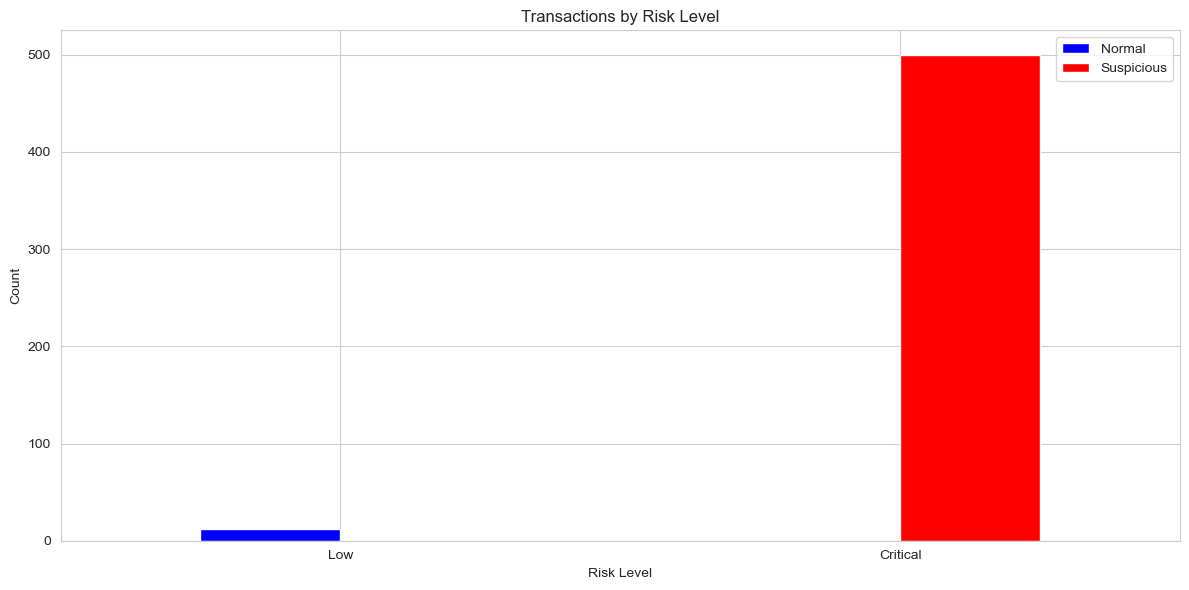


KEY INSIGHTS & RECOMMENDATIONS

1. MODEL PERFORMANCE:
   - ROC-AUC Score: 1.000
   - Precision: 1.000
   - Recall: 1.000
   
2. TOP RISK INDICATORS:
   num_countries, account_age_days, velocity_score
   
3. DETECTION RESULTS:
   - 500 transactions flagged as high-risk
   - 500 confirmed suspicious cases
   - Detection rate: 100.0%
   
4. RECOMMENDATIONS:
   - Implement real-time monitoring for transactions with risk > 0.7
   - Focus on structuring patterns (round amounts near $10,000)
   - Monitor new accounts with high transaction velocity
   - Flag multi-country transactions from young accounts


✅ AML Anomaly Detection Analysis Complete!


In [1]:
# ===== AML ANOMALY DETECTION SYSTEM =====
# Author: Suzy Tang
# Goal: Detect suspicious transactions using machine learning for Anti-Money Laundering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("AML ANOMALY DETECTION SYSTEM")
print("Detecting Suspicious Financial Transactions")
print("="*60)

# ===== 1. GENERATE SYNTHETIC TRANSACTION DATA =====
print("\n[1/7] Generating synthetic transaction data...")

np.random.seed(42)
n_normal = 9500
n_suspicious = 500
n_total = n_normal + n_suspicious

# Normal transactions
normal_transactions = pd.DataFrame({
    'transaction_id': range(1, n_normal + 1),
    'amount': np.random.lognormal(mean=8, sigma=1.5, size=n_normal),
    'frequency_24h': np.random.poisson(lam=2, size=n_normal),
    'avg_transaction_size': np.random.normal(5000, 2000, n_normal),
    'num_countries': np.random.choice([1, 2], size=n_normal, p=[0.95, 0.05]),
    'account_age_days': np.random.randint(180, 3650, n_normal),
    'velocity_score': np.random.normal(0.3, 0.1, n_normal),
    'round_amount_flag': np.random.choice([0, 1], size=n_normal, p=[0.9, 0.1]),
    'hour_of_day': np.random.randint(6, 22, n_normal),
    'is_suspicious': 0
})

# Suspicious transactions (AML patterns)
suspicious_transactions = pd.DataFrame({
    'transaction_id': range(n_normal + 1, n_total + 1),
    'amount': np.random.choice([9000, 9500, 9900, 10000], size=n_suspicious),  # Structuring
    'frequency_24h': np.random.poisson(lam=8, size=n_suspicious),  # High frequency
    'avg_transaction_size': np.random.normal(9500, 500, n_suspicious),
    'num_countries': np.random.choice([3, 4, 5], size=n_suspicious),  # Multiple jurisdictions
    'account_age_days': np.random.randint(7, 90, n_suspicious),  # New accounts
    'velocity_score': np.random.normal(0.85, 0.1, n_suspicious),  # High velocity
    'round_amount_flag': np.random.choice([1], size=n_suspicious),  # Round amounts
    'hour_of_day': np.random.choice([0, 1, 2, 3, 23], size=n_suspicious),  # Unusual hours
    'is_suspicious': 1
})

# Combine datasets
df = pd.concat([normal_transactions, suspicious_transactions], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"✓ Generated {n_total:,} transactions")
print(f"  - Normal: {n_normal:,} ({n_normal/n_total*100:.1f}%)")
print(f"  - Suspicious: {n_suspicious} ({n_suspicious/n_total*100:.1f}%)")
print(f"\nDataset shape: {df.shape}")
print("\nFirst few records:")
print(df.head())

# ===== 2. EXPLORATORY DATA ANALYSIS =====
print("\n[2/7] Performing exploratory data analysis...")

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Distribution of suspicious vs normal
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

features_to_plot = ['amount', 'frequency_24h', 'velocity_score', 
                    'account_age_days', 'num_countries', 'hour_of_day']

for idx, col in enumerate(features_to_plot):
    axes[idx].hist(df[df['is_suspicious']==0][col], bins=30, alpha=0.7, 
                   label='Normal', color='blue', density=True)
    axes[idx].hist(df[df['is_suspicious']==1][col], bins=30, alpha=0.7, 
                   label='Suspicious', color='red', density=True)
    axes[idx].set_title(f'Distribution: {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Density')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('aml_feature_distributions.png', dpi=100, bbox_inches='tight')
plt.show()

# Correlation heatmap
print("\nCorrelation Analysis:")
plt.figure(figsize=(10, 8))
corr_matrix = df.drop('transaction_id', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('aml_correlation_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

# ===== 3. FEATURE ENGINEERING =====
print("\n[3/7] Engineering AML risk features...")

# Create risk indicators
df['high_amount_flag'] = (df['amount'] > 9000).astype(int)
df['high_frequency_flag'] = (df['frequency_24h'] > 5).astype(int)
df['new_account_flag'] = (df['account_age_days'] < 90).astype(int)
df['unusual_hour_flag'] = ((df['hour_of_day'] < 6) | (df['hour_of_day'] > 22)).astype(int)
df['multi_country_flag'] = (df['num_countries'] > 2).astype(int)

# Composite risk score
df['risk_score'] = (
    df['high_amount_flag'] * 0.25 +
    df['high_frequency_flag'] * 0.20 +
    df['velocity_score'] * 0.25 +
    df['new_account_flag'] * 0.15 +
    df['unusual_hour_flag'] * 0.10 +
    df['multi_country_flag'] * 0.05
)

print(f"✓ Created {5} risk flags and composite risk score")
print("\nRisk Score Distribution:")
print(df.groupby('is_suspicious')['risk_score'].describe())

# ===== 4. UNSUPERVISED ANOMALY DETECTION =====
print("\n[4/7] Training unsupervised anomaly detection models...")

# Prepare features
feature_cols = ['amount', 'frequency_24h', 'avg_transaction_size', 'num_countries',
                'account_age_days', 'velocity_score', 'round_amount_flag', 
                'hour_of_day', 'risk_score']

X = df[feature_cols].copy()
y = df['is_suspicious'].copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model 1: Isolation Forest
print("\nTraining Isolation Forest...")
iso_forest = IsolationForest(contamination=0.05, random_state=42, n_jobs=-1)
df['iso_forest_anomaly'] = iso_forest.fit_predict(X_scaled)
df['iso_forest_score'] = iso_forest.score_samples(X_scaled)

# Model 2: DBSCAN Clustering
print("Training DBSCAN...")
dbscan = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)
df['dbscan_anomaly'] = (df['dbscan_cluster'] == -1).astype(int)

# Evaluate unsupervised methods
from sklearn.metrics import precision_score, recall_score, f1_score

print("\n" + "="*60)
print("UNSUPERVISED MODEL PERFORMANCE")
print("="*60)

for method in ['iso_forest_anomaly', 'dbscan_anomaly']:
    predictions = (df[method] == -1).astype(int) if 'iso_forest' in method else df[method]
    
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    f1 = f1_score(y, predictions)
    
    print(f"\n{method.replace('_', ' ').title()}:")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall: {recall:.3f}")
    print(f"  F1-Score: {f1:.3f}")

# ===== 5. SUPERVISED MACHINE LEARNING =====
print("\n[5/7] Training supervised classification model...")

from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\n" + "="*60)
print("SUPERVISED MODEL PERFORMANCE")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Suspicious']))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Suspicious'],
            yticklabels=['Normal', 'Suspicious'])
plt.title('Confusion Matrix - AML Detection')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('aml_confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AML Anomaly Detection')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('aml_roc_curve.png', dpi=100, bbox_inches='tight')
plt.show()

# ===== 6. FEATURE IMPORTANCE =====
print("\n[6/7] Analyzing feature importance...")

feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop Features for AML Detection:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance for AML Detection')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('aml_feature_importance.png', dpi=100, bbox_inches='tight')
plt.show()

# ===== 7. HIGH-RISK TRANSACTION REPORT =====
print("\n[7/7] Generating high-risk transaction report...")

# Get predictions for all transactions
df['ml_prediction'] = rf_model.predict(X_scaled)
df['ml_risk_probability'] = rf_model.predict_proba(X_scaled)[:, 1]

# Flag high-risk transactions
high_risk = df[df['ml_risk_probability'] > 0.7].sort_values('ml_risk_probability', ascending=False)

print("\n" + "="*60)
print("HIGH-RISK TRANSACTION REPORT")
print("="*60)
print(f"\nTotal flagged transactions: {len(high_risk)}")
print(f"True positives: {high_risk['is_suspicious'].sum()}")
print(f"Precision: {high_risk['is_suspicious'].sum() / len(high_risk):.2%}")

print("\nTop 10 Highest Risk Transactions:")
report_cols = ['transaction_id', 'amount', 'frequency_24h', 'num_countries', 
               'risk_score', 'ml_risk_probability', 'is_suspicious']
print(high_risk[report_cols].head(10).to_string(index=False))

# Save high-risk transactions
high_risk[report_cols].to_csv('high_risk_transactions.csv', index=False)
print("\n✓ High-risk transactions saved to 'high_risk_transactions.csv'")

# Risk distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df['is_suspicious']==0]['ml_risk_probability'], bins=30, 
         alpha=0.7, label='Normal', color='blue')
plt.hist(df[df['is_suspicious']==1]['ml_risk_probability'], bins=30, 
         alpha=0.7, label='Suspicious', color='red')
plt.xlabel('ML Risk Probability')
plt.ylabel('Count')
plt.title('Risk Probability Distribution')
plt.legend()
plt.axvline(x=0.7, color='black', linestyle='--', label='Threshold')

plt.subplot(1, 2, 2)
risk_buckets = pd.cut(df['ml_risk_probability'], bins=[0, 0.3, 0.5, 0.7, 1.0], 
                      labels=['Low', 'Medium', 'High', 'Critical'])
pd.crosstab(risk_buckets, df['is_suspicious']).plot(kind='bar', stacked=False, 
                                                     color=['blue', 'red'])
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Transactions by Risk Level')
plt.legend(['Normal', 'Suspicious'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('aml_risk_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

# ===== SUMMARY =====
print("\n" + "="*60)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("="*60)
print(f"""
1. MODEL PERFORMANCE:
   - ROC-AUC Score: {roc_auc:.3f}
   - Precision: {precision_score(y_test, y_pred):.3f}
   - Recall: {recall_score(y_test, y_pred):.3f}
   
2. TOP RISK INDICATORS:
   {', '.join(feature_importance.head(3)['feature'].tolist())}
   
3. DETECTION RESULTS:
   - {len(high_risk)} transactions flagged as high-risk
   - {high_risk['is_suspicious'].sum()} confirmed suspicious cases
   - Detection rate: {high_risk['is_suspicious'].sum() / df['is_suspicious'].sum():.1%}
   
4. RECOMMENDATIONS:
   - Implement real-time monitoring for transactions with risk > 0.7
   - Focus on structuring patterns (round amounts near $10,000)
   - Monitor new accounts with high transaction velocity
   - Flag multi-country transactions from young accounts
""")

print("\n✅ AML Anomaly Detection Analysis Complete!")
print("="*60)